### Cyclistic analysis project
A bike rental company (cyclistic)

In [1]:
import pandas as pd

### Importing 12 months merged data of cyclistics (2021)

In [2]:
dataset = pd.read_csv('merged_cyclistic_data.csv')

In [3]:
dataset.tail()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6226284,247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
6226285,247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
6226286,247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
6226287,247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member
6226288,247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.877850,-87.624080,41.881320,-87.629521,member


In [4]:
dataset.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### Dropping column named 'Unnamed: 0'
Which does not provide insight over data

In [5]:
dataset.drop(labels='Unnamed: 0',inplace=True,axis=1)

In [8]:
dataset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


### Dropping less effective columns

In [9]:
dataset.drop(labels=['ride_id','start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1,inplace=True)

In [10]:
dataset.tail()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
6226284,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,NaN,casual
6226285,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,Kingsbury St & Kinzie St,member
6226286,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,Dearborn St & Monroe St,member
6226287,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,NaN,member
6226288,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,Dearborn St & Monroe St,member


### Converting to datetime format
'started_at' and 'ended_at' columns are of object types 

In [11]:
dataset['started_at'] = pd.to_datetime(dataset['started_at'] )

In [12]:
dataset['ended_at'] = pd.to_datetime(dataset['ended_at'] )

In [13]:
dataset.dtypes

rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
member_casual                 object
dtype: object

### Calculating duration of ride
since both 'started_at' and 'ended_at' are in *datetime* format we can directly subtract them to get *timedelta* type.     
values are then stored in 'ride_length' column.

In [14]:
dataset['ride_length'] = dataset['ended_at'] - dataset['started_at']

In [15]:
dataset

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,0 days 00:10:25
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,0 days 00:04:04
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,0 days 00:01:20
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,0 days 00:11:42
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,0 days 00:00:43
...,...,...,...,...,...,...,...
6226284,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,NaN,casual,0 days 00:19:13
6226285,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,Kingsbury St & Kinzie St,member,0 days 00:07:01
6226286,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,Dearborn St & Monroe St,member,0 days 00:08:17
6226287,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,NaN,member,0 days 00:14:13


### Creating a column with day of week from 'started_at'
pandas provide a class '.dt' which will return a numpy array of particular part of datetiem.

creating a new column 'day_of_week' with day name

In [17]:
dataset['day_of_week']=dataset['started_at'].dt.day_name()

In [18]:
dataset.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,day_of_week
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,0 days 00:10:25,Saturday
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,0 days 00:04:04,Wednesday
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,0 days 00:01:20,Thursday
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,0 days 00:11:42,Thursday
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,0 days 00:00:43,Saturday


### Creating pivot tables with pandas library function 'pivot_table'

In [19]:
table = pd.pivot_table(dataset,index = ['day_of_week','member_casual'],values=['ride_length'],aggfunc='count')

In [20]:
table_v2 = pd.pivot_table(dataset,index ='day_of_week',columns='member_casual',values=['ride_length'],aggfunc='count')

### Creating table with number of rides of member and casual by day name

In [21]:
table_v2

ride_length        
member_casual      casual  member
day_of_week                      
Friday             403611  506224
Monday             308428  457875
Saturday           624747  495023
Sunday             533785  424280
Thursday           308393  498645
Tuesday            301474  523077
Wednesday          305809  534918

In [22]:
import matplotlib.pyplot as plt

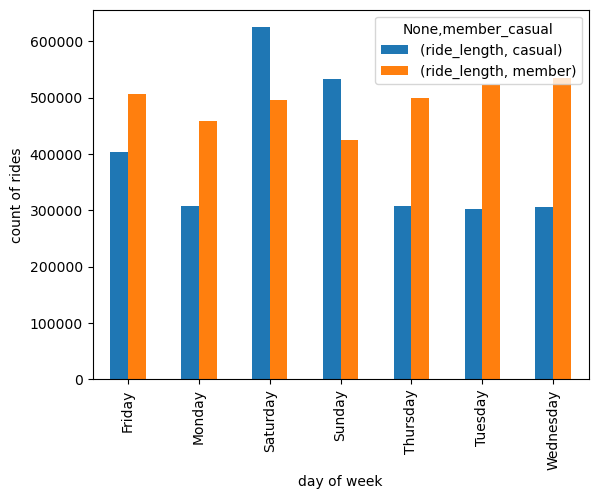

In [24]:
table_v2.plot(kind='bar',xlabel='day of week',ylabel='count of rides' )
table_v2.to_csv('day_of_week_popularity.csv')

In [26]:
dataset.dtypes

rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
end_station_name               object
member_casual                  object
ride_length           timedelta64[ns]
day_of_week                    object
dtype: object

### Creating a column with month of the year from 'started_at'
Here we can use the dt.month

In [27]:
dataset['month'] = dataset['started_at'].dt.month

In [28]:
dataset

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,day_of_week,month
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,0 days 00:10:25,Saturday,1
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,0 days 00:04:04,Wednesday,1
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,0 days 00:01:20,Thursday,1
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,0 days 00:11:42,Thursday,1
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,0 days 00:00:43,Saturday,1
...,...,...,...,...,...,...,...,...,...
6226284,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,NaN,casual,0 days 00:19:13,Sunday,12
6226285,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,Kingsbury St & Kinzie St,member,0 days 00:07:01,Monday,12
6226286,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,Dearborn St & Monroe St,member,0 days 00:08:17,Thursday,12
6226287,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,NaN,member,0 days 00:14:13,Monday,12


### A table with number of rides of member and casual by month of year

In [29]:
table_v3 = pd.pivot_table(dataset,index='month',columns='member_casual',values='ride_length',aggfunc='count')

In [30]:
table_v3

member_casual,casual,member
month,,
1,18117,78717
2,10131,39491
3,84033,144463
4,136601,200629
5,256916,274717
6,370681,358914
7,442056,380354
8,412671,391681
9,363890,392257


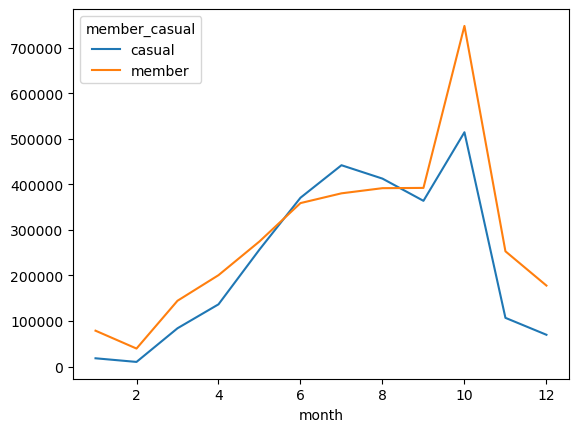

In [31]:
table_v3.plot(kind='line')
table_v3.to_csv('no_of_ridesper_month_casualmember.csv')

### Table with rideable_type type popularity among casual and members

In [32]:
table_v4 = pd.pivot_table(dataset,index='member_casual',columns='rideable_type',values='ride_length',aggfunc='count')

In [33]:
table_v4.to_csv('rideable_type.csv')

In [34]:
table_v4.head()

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1372246,335226,1078775
member,2194921,1,1245120


<AxesSubplot:xlabel='member_casual', ylabel='popularity'>

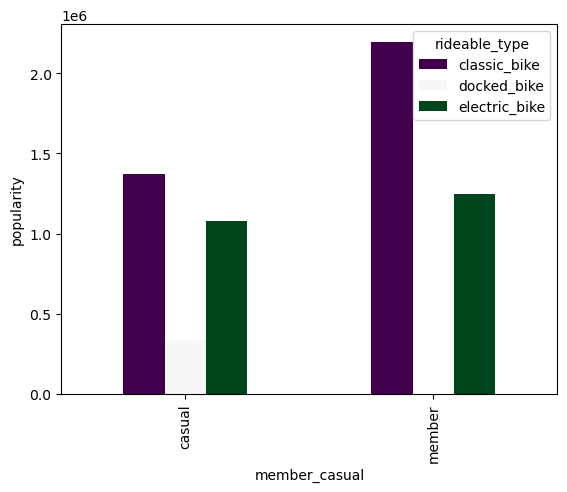

In [35]:
table_v4.plot(kind='bar',ylabel='popularity',colormap='PRGn')

### Finding popular start_station_name and sorting them in descending order
task can also be achieved with pivot tables

In [76]:
df=dataset.groupby(['start_station_name']).count()

In [77]:
df.sort_values('month',ascending=False,inplace=True)

In [78]:
df=df['month'].head(10)

In [79]:
df.to_csv('start_station.csv')

In [80]:
df

start_station_name
Streeter Dr & Grand Ave     88755
Wells St & Concord Ln       48211
Michigan Ave & Oak St       47605
Millennium Park             46438
Clark St & Elm St           45623
Wells St & Elm St           41582
Theater on the Lake         39348
Kingsbury St & Kinzie St    37327
Clark St & Lincoln Ave      36576
Clark St & Armitage Ave     36303
Name: month, dtype: int64

### Finding popular end_station_name and sorting them in descending order

In [72]:
df_2=dataset.groupby(['end_station_name']).count()

In [73]:
df_2.sort_values('month',ascending=False,inplace=True)

In [74]:
df_2=df_2['month'].head(10)

In [75]:
df_2

end_station_name
Streeter Dr & Grand Ave     89624
Wells St & Concord Ln       48458
Michigan Ave & Oak St       48097
Millennium Park             47143
Clark St & Elm St           44865
Wells St & Elm St           41258
Theater on the Lake         39547
Kingsbury St & Kinzie St    36606
Clark St & Lincoln Ave      36486
Wabash Ave & Grand Ave      36415
Name: month, dtype: int64

In [81]:
df_2.to_csv('end_station.csv')

In [54]:
dataset.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,day_of_week,month
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,0 days 00:10:25,Saturday,1
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,0 days 00:04:04,Wednesday,1
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,0 days 00:01:20,Thursday,1
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,0 days 00:11:42,Thursday,1
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,0 days 00:00:43,Saturday,1


### Table of average ride duration of member and casual by day of name

In [55]:
table_v5=pd.pivot_table(dataset,index=['day_of_week','member_casual'],values='ride_length',aggfunc='mean')

In [56]:
table_v5.to_csv('average_ridelength.csv')

### Visuals are created in Google sheets from pivot tables created in python